In [15]:
import json
from matplotlib import pyplot as plt
import pandas as pd

In [22]:
windowSize = 500
randomSequSIG = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode20-dqn/sequential_rollout_RANDOM_SIG.json'
SequentialResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode20-dqn/iDQN_sequential_rollout.json'
RuleBasedResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode20-dqn/iDQN_rule_based.json'
approxSeq_3220 = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode20-dqn/approx_sequential_rollout_63_3220.json'
def findMovingAvg(inputDF,window):
    movingAvgList = []
    for i in range(inputDF.shape[0] - window):
        newDF = inputDF.loc[i:i + window]
        epi = inputDF.iloc[i]['episode']
        meanVal = newDF['steps'].mean()
        movingAvgList.append({'episode':epi, 'smoothed_steps':meanVal})
    dfMovingAvg = pd.DataFrame(movingAvgList)
    return dfMovingAvg

In [17]:
with open(randomSequSIG, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfrandomSequSIG = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)

In [23]:
with open(approxSeq_3220, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfApproxSeq = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)

In [18]:
with open(RuleBasedResults, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfBasePolicy = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)
dfBasePolicy = dfBasePolicy.iloc[0:1800]

In [19]:
with open(SequentialResults, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfSeqRollout = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)
dfSeqRollout = dfSeqRollout.iloc[0:1800]

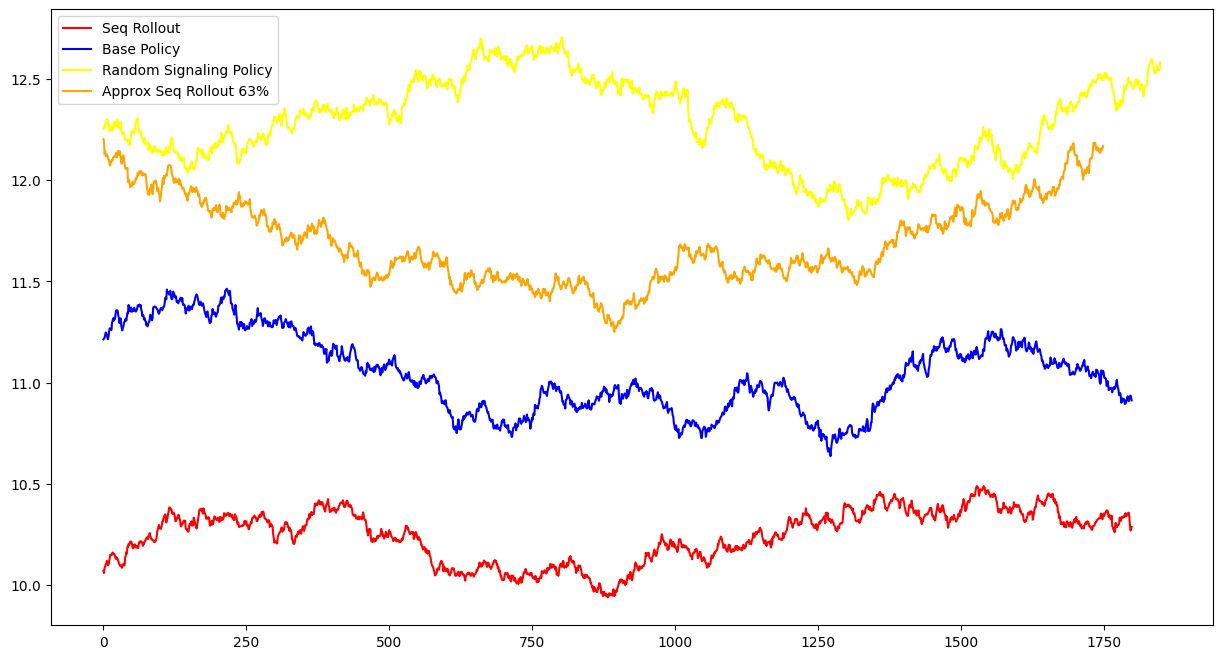

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(dfSeqRollout['episode'], dfSeqRollout['smoothed_steps'], label='Seq Rollout', color='red', linestyle='-')
plt.plot(dfBasePolicy['episode'], dfBasePolicy['smoothed_steps'], label='Base Policy', color='blue', linestyle='-')
plt.plot(dfrandomSequSIG['episode'], dfrandomSequSIG['smoothed_steps'], label='Random Signaling Policy', color='yellow', linestyle='-')
plt.plot(dfApproxSeq['episode'], dfApproxSeq['smoothed_steps'], label='Approx Seq Rollout 63%', color='orange', linestyle='-')

plt.legend()